In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# lets first generate a dataset of 100 points this time
np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

In [7]:
X.shape,y.shape

((100, 1), (100, 1))

In [9]:
from sklearn.model_selection import train_test_split
#0.6, 0.2, 0.2 split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [10]:
X_train.shape, X_val.shape, X_test.shape

((60, 1), (20, 1), (20, 1))

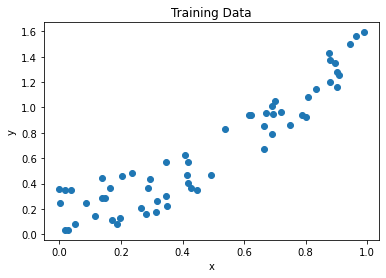

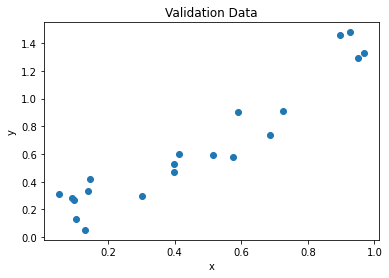

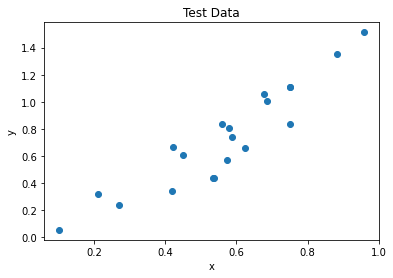

In [11]:
fig = plt.figure()
plt.scatter(X_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

fig = plt.figure()
plt.scatter(X_val, y_val)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation Data")
plt.show()

fig = plt.figure()
plt.scatter(X_test, y_test)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data")
plt.show()

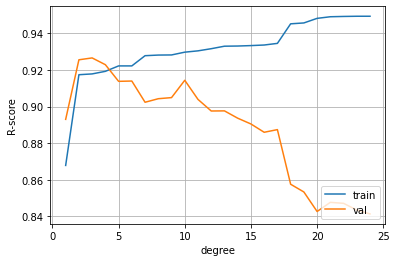

In [12]:
# Train and Validatation without hyper param tuning. Just by controlling the degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# let's do hyperparameter tuning on degress. 
max_degree = 25 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    val_score = polyreg_scaled.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)
    
plt.figure()
plt.plot(list(range(1, 25)), train_scores, label="train")
plt.plot(list(range(1, 25)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.grid()
plt.show()

In [13]:
val_scores[:5]

[0.8929913947370465,
 0.9255429437522548,
 0.9265644978354082,
 0.9228656258639485,
 0.913771536254521]

Degree = 3 is the best degree.

In [16]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

train_scores = []
val_scores = []
scaler = StandardScaler()
for alpha in range(1,10):
  polyreg_scaled = make_pipeline(PolynomialFeatures(32), scaler, Ridge(alpha))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  val_score = polyreg_scaled.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)
print(val_scores[:5])

[0.9191998246630932, 0.9216636347450738, 0.9225261379655693, 0.9228107199506557, 0.9227920796141761]


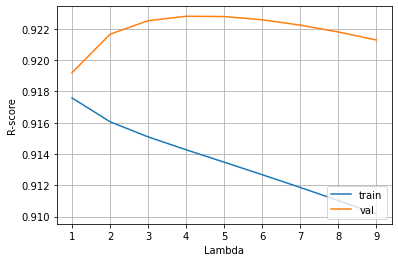

In [18]:
plt.figure()
plt.plot(list(range(1, 10)), train_scores, label="train")
plt.plot(list(range(1, 10)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("Lambda")
plt.ylabel("R-score")
plt.grid()
plt.show()

Lambda = 4 is the best Lambda.

In [19]:
polyreg_scaled = make_pipeline(PolynomialFeatures(32), scaler, Ridge(4))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
print(train_score)
val_score = polyreg_scaled.score(X_val, y_val)
print(val_score)

0.914269817149344
0.9228107199506557


In [20]:
# I will report this number to my manager. 
polyreg_scaled.score(X_test, y_test)

0.8600650376478309

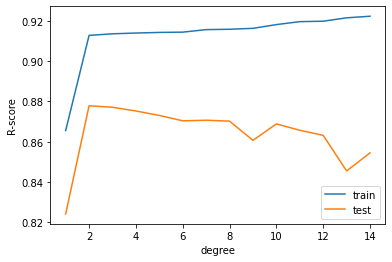

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

degrees = 15 # number of data-points
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds
    
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
    
        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model
        
        train_score = polyreg_scaled.score(X_train, y_train)
        val_score = polyreg_scaled.score(X_val, y_val)
        
        fold_train_scores.append(train_score) 
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores) 
    val_score = np.mean(fold_val_scores)
    
    train_scores.append(train_score)
    val_scores.append(val_score)

plt.figure()
plt.plot(list(range(1, 15)), train_scores, label="train")
plt.plot(list(range(1, 15)), val_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.show()